In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
f = uproot.open('output_000498.root')

In [4]:
data = f['midas_data']

In [5]:
tdc = data['tdc_value'].array(library="np", entry_start=0)

In [6]:
adc = data['adc_value'].array(library="np", entry_start=0)

In [7]:
adc[1]

array([  67, 1473,  646,  139,  174,  147,   86,  131,  135,  187,  140,
        157,  147,  143,  154,  185,  123,  144,  150,  197,  149,  153,
        161,  191,  154,  186,  162,  144,  145,  164,  145,  150],
      dtype=int32)

In [8]:
adc_data = {'BC1':[], 'BC2':[], 'BC3':[], 
       'C2':[], 'C3':[], 'C4':[], 'C5':[], 'C6':[]}
for adc_i in adc:
#     print(adc_i)
    adc_data['BC1'].append(adc_i[0])
    adc_data['BC2'].append(adc_i[1])
    adc_data['BC3'].append(adc_i[2])
    
    adc_data['C2'].append(adc_i[3])
    adc_data['C3'].append(adc_i[4])
    adc_data['C4'].append(adc_i[5])
    adc_data['C5'].append(adc_i[6])
    adc_data['C6'].append(adc_i[7])

In [9]:
tdc_data = {'BC1':[], 'BC2':[], 'BC3':[], 
       'C2':[], 'C3':[], 'C4':[], 'C5':[], 'C6':[]}
for tdc_i in tdc:
#     print(tdc_i)
    tdc_data['BC1'].append(tdc_i[1])
    tdc_data['BC2'].append(tdc_i[2])
    tdc_data['BC3'].append(tdc_i[3])

In [10]:
for k in tdc_data.keys():
    tdc_data[k] = np.array(tdc_data[k])

In [11]:
for k in adc_data.keys():
    adc_data[k] = np.array(adc_data[k])

In [12]:
from scipy.optimize import curve_fit

In [13]:
def gauss(x, *p):
    A, t0, v = p
    return A*np.exp(-(x-t0)**2/(2.*v))

In [14]:
dt = tdc_data['BC3']-tdc_data['BC1']
mask = dt != 0
# mask_mu = mask*(dt)*()

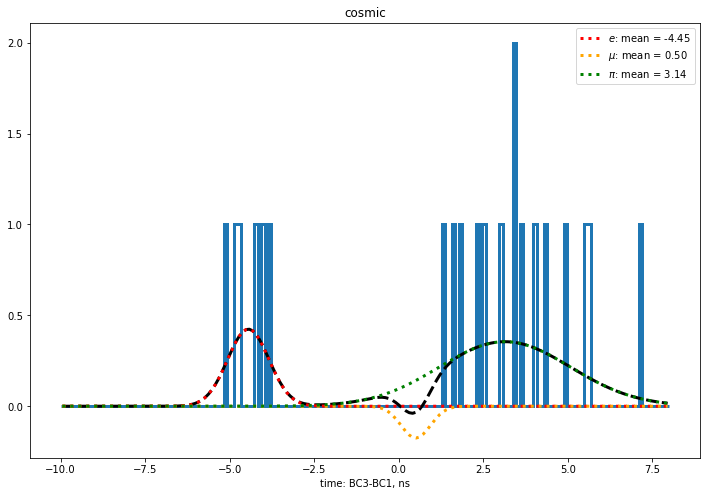

In [15]:
plt.figure(figsize=(12,8))
plt.title('cosmic')

h, b, _ = plt.hist(dt[mask]/10., 
                     179, range=(-10, 8),
                     histtype='step', lw=3)

def comb_gauss(x, *p):
    distr = 0
    for j in range(3):
        distr += gauss(x, *[p[j*3],p[j*3+1],p[j*3+2]])
    return distr

bin_centres = b[:-1] + (b[1]-b[0])/2
coeff, _ = curve_fit(comb_gauss, bin_centres, h, p0=[4000, -5, 1, 16000, -1, 1, 4000, 2, 1])
fit_hist = comb_gauss(bin_centres, *coeff)
plt.plot(bin_centres, fit_hist, c='k', lw=3, ls='--')

plt.plot(bin_centres, gauss(bin_centres, *coeff[0:3]), c='r', lw=3, ls=':', 
        label=f'$e$: mean = {coeff[1]:.2f}')
plt.plot(bin_centres, gauss(bin_centres, *coeff[3:6]), c='orange', lw=3, ls=':', 
        label=f'$\mu$: mean = {coeff[4]:.2f}')
plt.plot(bin_centres, gauss(bin_centres, *coeff[6:]), c='g', lw=3, ls=':', 
        label=f'$\pi$: mean = {coeff[7]:.2f}')

# plt.hist(dt[mask_e]/10, 
#          179, range=(-10, 8),
#          histtype='stepfilled', lw=3, alpha=0.2, color='r')

plt.xlabel('time: BC3-BC1, ns')
plt.legend()

In [16]:
mask_e = mask*(dt/10>coeff[1]-2*np.sqrt(coeff[2]))*(dt/10<coeff[1]+2*np.sqrt(coeff[2]))

In [17]:
min(dt)

-9288

In [18]:
dt_e = dt[mask_e]/10 #ns

In [19]:
length = 3.18 #m

In [20]:
speed_e = length/dt_e

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([-0.83684211, -0.82973168, -0.82262126, -0.81551084, -0.80840041,
        -0.80128999, -0.79417957, -0.78706914, -0.77995872, -0.7728483 ,
        -0.76573787, -0.75862745, -0.75151703, -0.7444066 , -0.73729618,
        -0.73018576, -0.72307534, -0.71596491, -0.70885449, -0.70174407,
        -0.69463364, -0.68752322, -0.6804128 , -0.67330237, -0.66619195,
        -0.65908153, -0.6519711 , -0.64486068, -0.63775026, -0.63063983,
        -0.62352941]),
 <BarContainer object of 30 artists>)

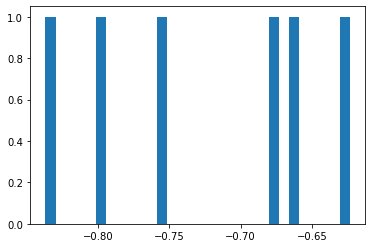

In [21]:
plt.hist(speed_e, 30)

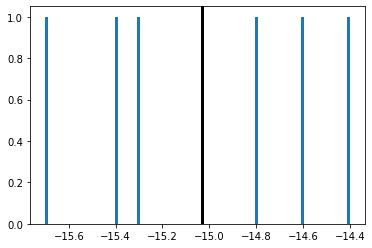

In [22]:
offset = dt_e - length/0.3
plt.hist(offset, 100)
offset_mean = np.mean(offset)
plt.axvline(offset_mean, c='k', lw=3)

/tmp/ipykernel_65938/3245919372.py:3: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x-t0)**2/(2.*v))


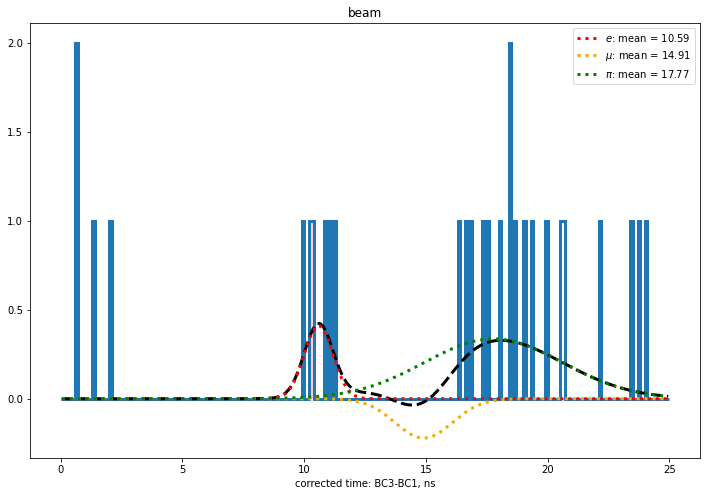

In [23]:
plt.figure(figsize=(12,8))
plt.title('beam')

h, b, _ = plt.hist(dt[mask]/10.-offset_mean, 
                     250, range=(0, 25),
                     histtype='step', lw=3)

def comb_gauss(x, *p):
    distr = 0
    for j in range(3):
        distr += gauss(x, *[p[j*3],p[j*3+1],p[j*3+2]])
    return distr

bin_centres = b[:-1] + (b[1]-b[0])/2
coeff_corr, _ = curve_fit(comb_gauss, bin_centres, h, p0=[4000, 10, 1, 16000, 14, 1, 4000, 17, 1])
fit_hist = comb_gauss(bin_centres, *coeff_corr)
plt.plot(bin_centres, fit_hist, c='k', lw=3, ls='--')

plt.plot(bin_centres, gauss(bin_centres, *coeff_corr[0:3]), c='r', lw=3, ls=':', 
        label=f'$e$: mean = {coeff_corr[1]:.2f}')
plt.plot(bin_centres, gauss(bin_centres, *coeff_corr[3:6]), c='orange', lw=3, ls=':', 
        label=f'$\mu$: mean = {coeff_corr[4]:.2f}')
plt.plot(bin_centres, gauss(bin_centres, *coeff_corr[6:]), c='g', lw=3, ls=':', 
        label=f'$\pi$: mean = {coeff_corr[7]:.2f}')

plt.hist(dt[mask_e]/10-offset_mean, 
         250, range=(0, 25),
         histtype='stepfilled', lw=3, alpha=0.2, color='r')

plt.xlabel('corrected time: BC3-BC1, ns')
plt.legend()

In [24]:

theta = np.array([90, 30,  330, 270, 210]) # 180-30, 180+30, 270, 330]) 
x = np.cos(theta/180*np.pi)
y = np.sin(theta/180*np.pi)




In [25]:
x

array([ 6.12323400e-17,  8.66025404e-01,  8.66025404e-01, -1.83697020e-16,
       -8.66025404e-01])

(-1.5, 1.5)

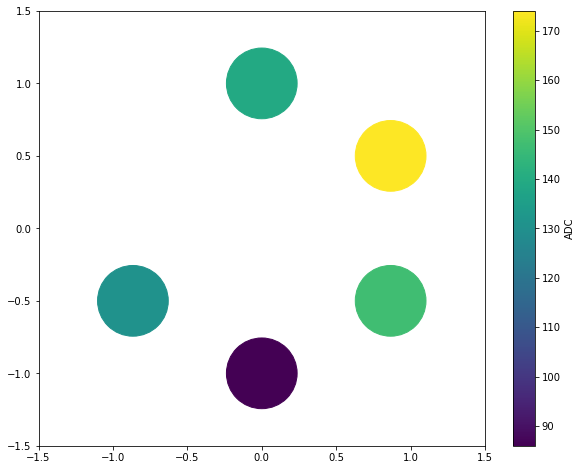

In [26]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[adc_data['C2'][1], adc_data['C3'][1], adc_data['C4'][1], 
               adc_data['C5'][1], adc_data['C6'][1]])

plt.colorbar(label='ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

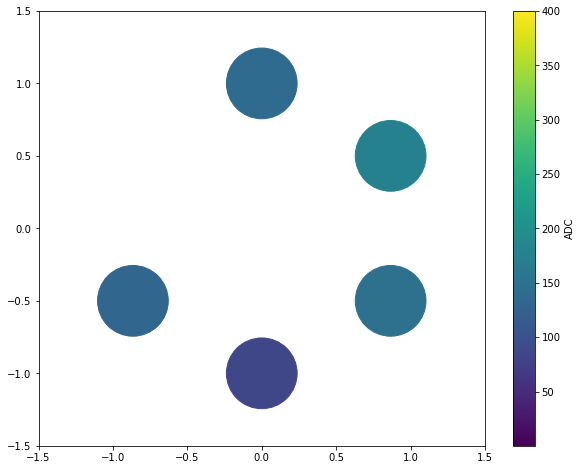

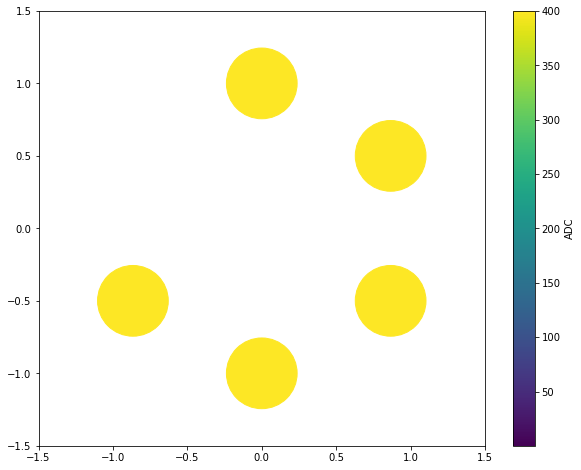

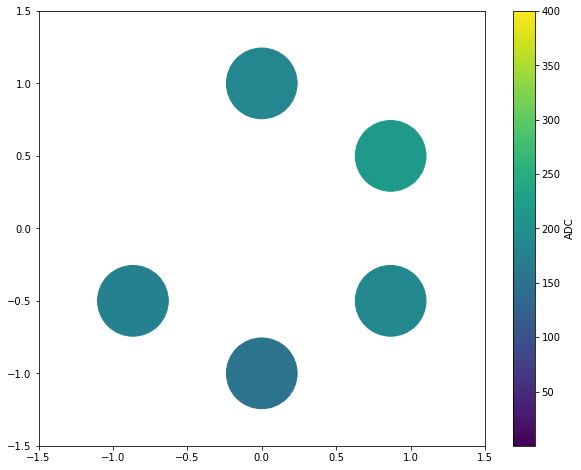

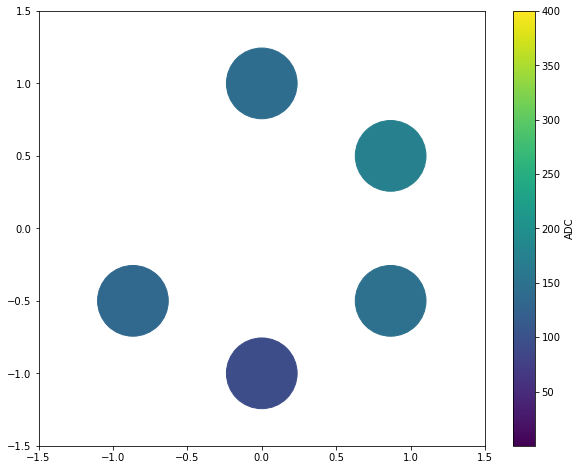

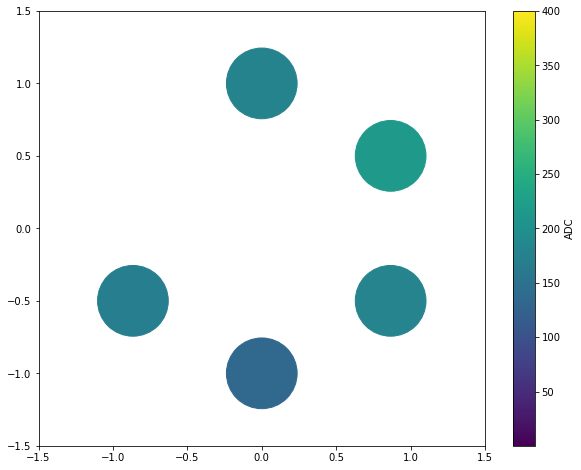

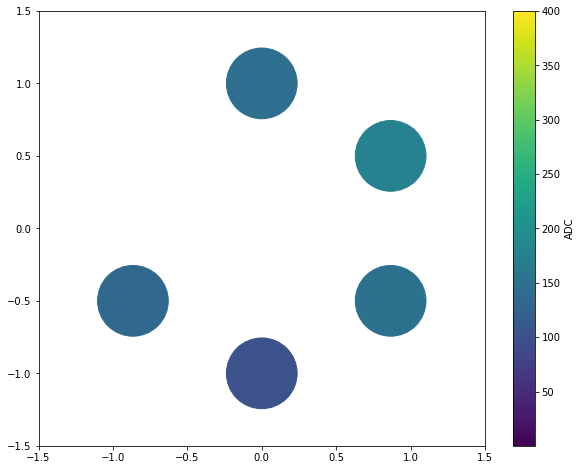

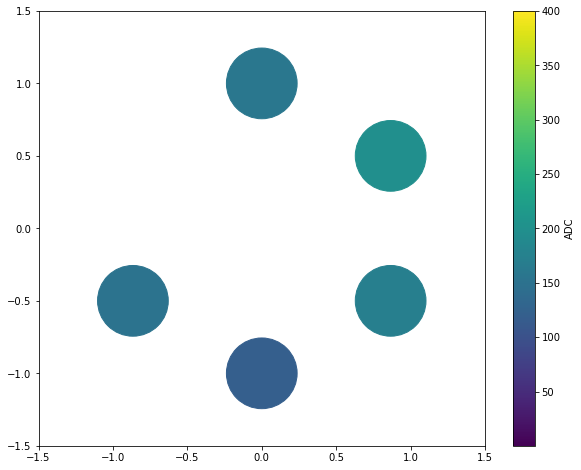

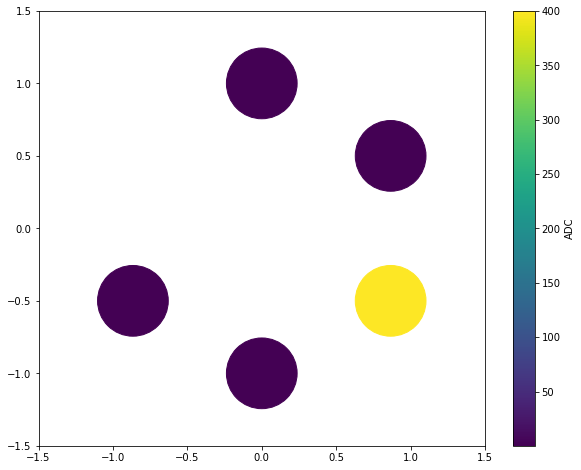

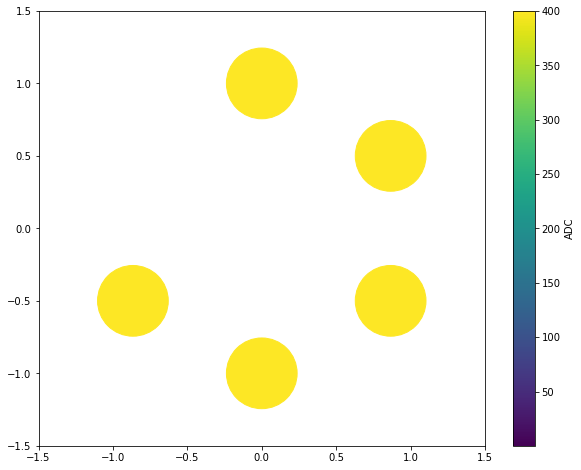

In [27]:
for i in range(1,10):
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, s=5000, 
                c=[adc_data['C2'][i], adc_data['C3'][i], adc_data['C4'][i], 
                   adc_data['C5'][i], adc_data['C6'][i]],
                norm=matplotlib.colors.Normalize(vmin=0.1, vmax=400))

    plt.colorbar(label='ADC')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

In [28]:
l = len(adc_data['C2'])

(-1.5, 1.5)

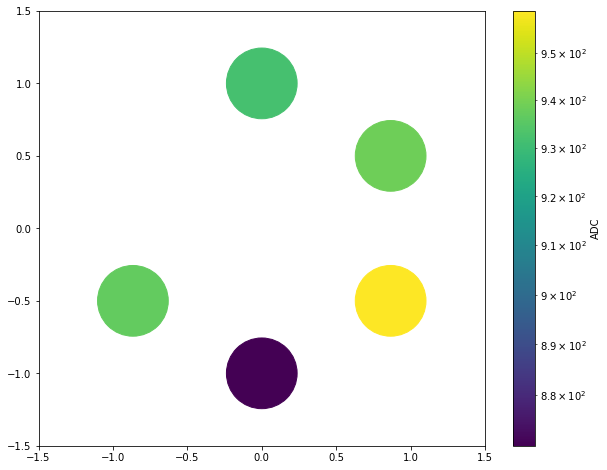

In [29]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[sum(adc_data['C2'])/l, sum(adc_data['C3'])/l, sum(adc_data['C4'])/l, 
               sum(adc_data['C5'])/l, sum(adc_data['C6'])/l],
            norm=matplotlib.colors.LogNorm())

plt.colorbar(label='ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

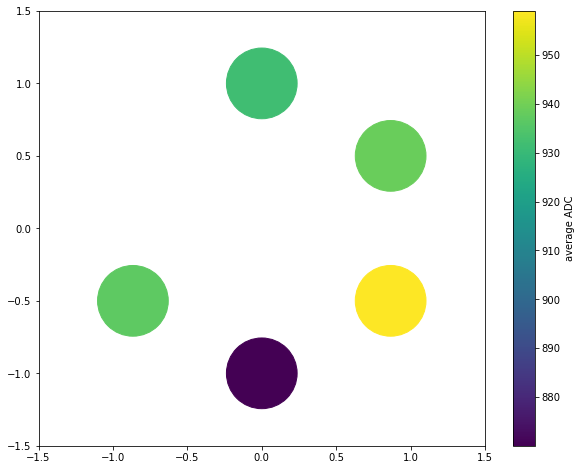

In [30]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[sum(adc_data['C2'])/l, sum(adc_data['C3'])/l, sum(adc_data['C4'])/l, 
               sum(adc_data['C5'])/l, sum(adc_data['C6'])/l],
            norm=matplotlib.colors.Normalize())

plt.colorbar(label='average ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

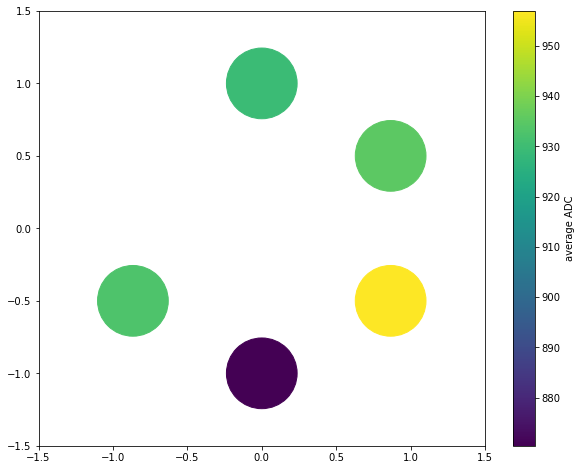

In [31]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[sum(adc_data['C2'][:int(l/2)])/l*2, sum(adc_data['C3'][:int(l/2)])/l*2, sum(adc_data['C4'][:int(l/2)])/l*2, 
               sum(adc_data['C5'][:int(l/2)])/l*2, sum(adc_data['C6'][:int(l/2)])/l*2],
            norm=matplotlib.colors.Normalize())

plt.colorbar(label='average ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

In [32]:
l

84748

(-1.5, 1.5)

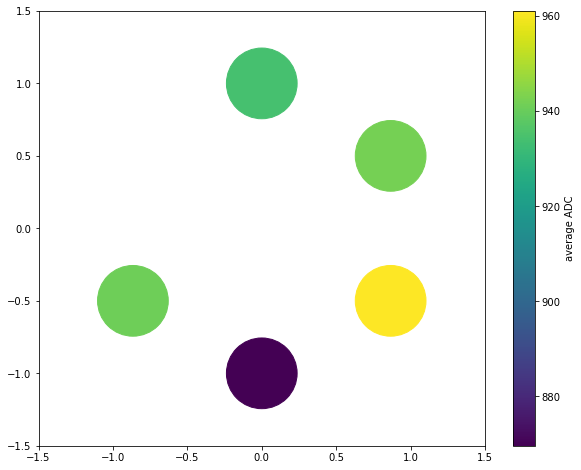

In [33]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[sum(adc_data['C2'][int(l/2):])/l*2, sum(adc_data['C3'][int(l/2):])/l*2, sum(adc_data['C4'][int(l/2):])/l*2, 
               sum(adc_data['C5'][int(l/2):])/l*2, sum(adc_data['C6'][int(l/2):])/l*2],
            norm=matplotlib.colors.Normalize())

plt.colorbar(label='average ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

(-1.5, 1.5)

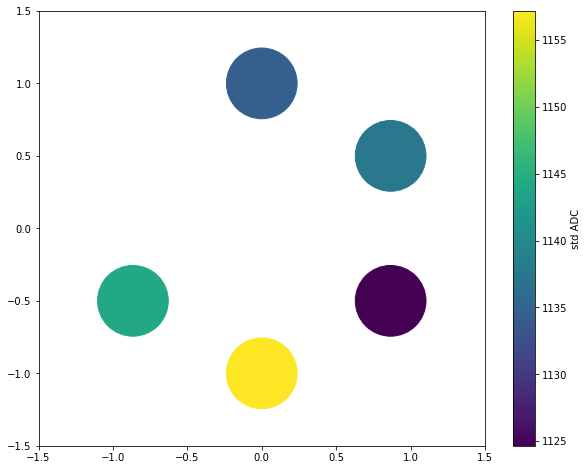

In [34]:
plt.figure(figsize=(10,8))

plt.scatter(x, y, s=5000, 
            c=[np.std(adc_data['C2']), np.std(adc_data['C3']), np.std(adc_data['C4']), 
               np.std(adc_data['C5']), np.std(adc_data['C6'])],
            norm=matplotlib.colors.Normalize())

plt.colorbar(label='std ADC')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

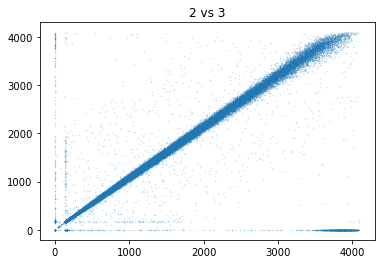

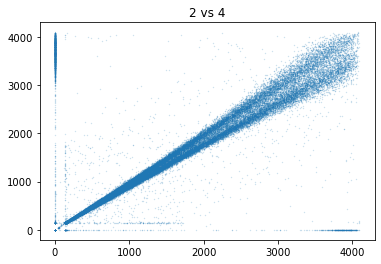

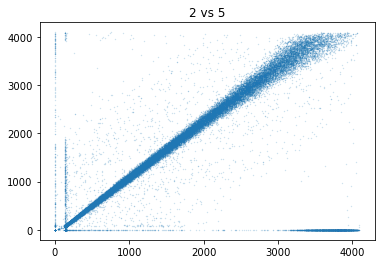

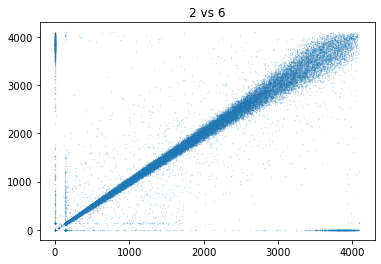

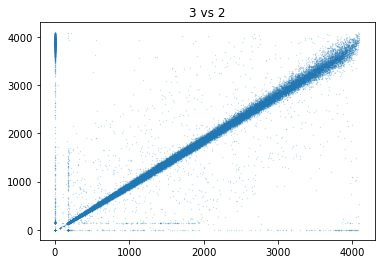

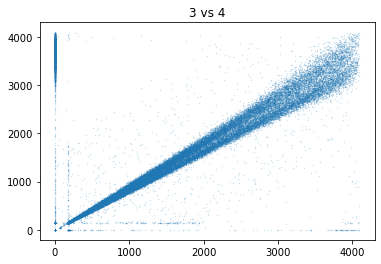

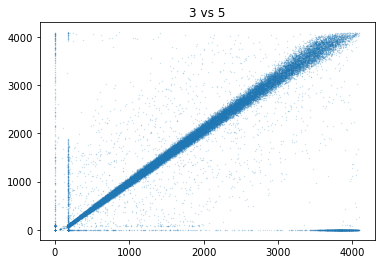

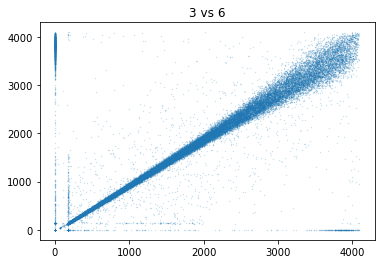

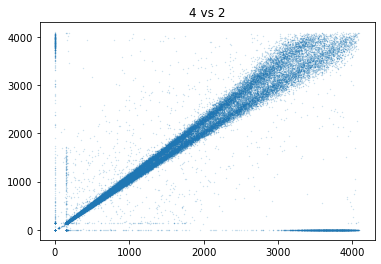

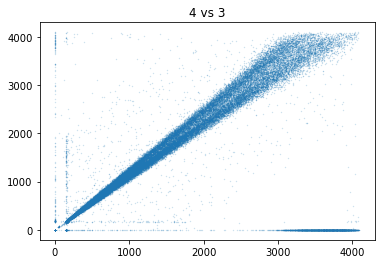

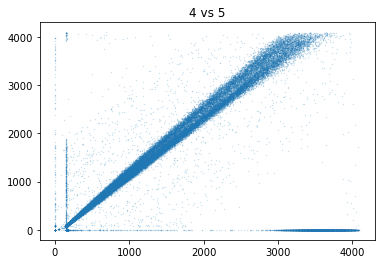

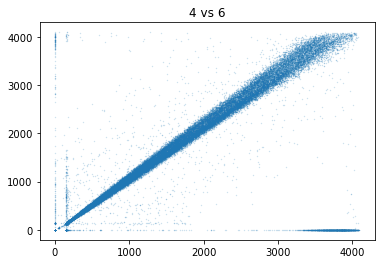

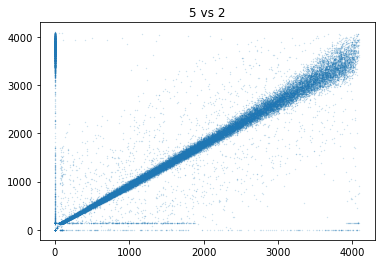

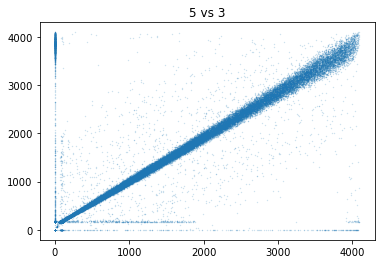

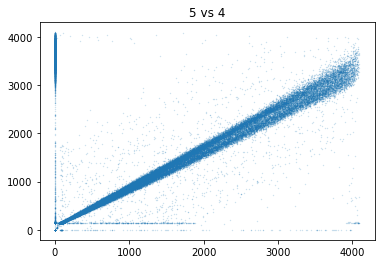

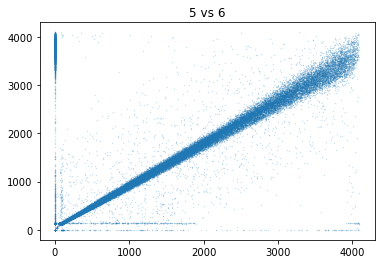

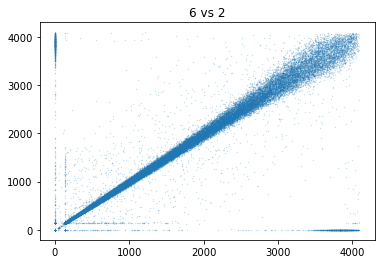

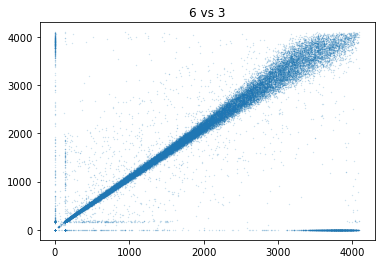

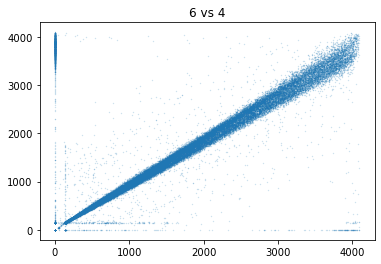

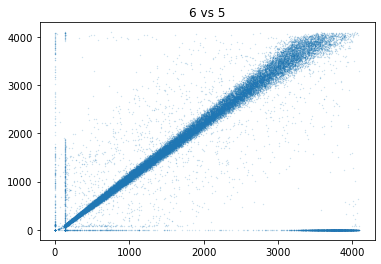

In [55]:
for i in range(2,7):
    for j in range(2,7):
        if i != j:
            plt.figure()
            plt.title(f"{i} vs {j}")
            plt.scatter(adc_data[f'C{i}'], adc_data[f'C{j}'], alpha=0.3, s=0.1)
            


In [36]:
import seaborn as sb
import pandas as pd

In [37]:
df = pd.DataFrame(adc_data)

In [38]:
# adc_data

In [39]:
df["BC1"]

0         0
1        67
2        67
3        67
4        67
         ..
84743    67
84744    67
84745    67
84746    67
84747    67
Name: BC1, Length: 84748, dtype: int32

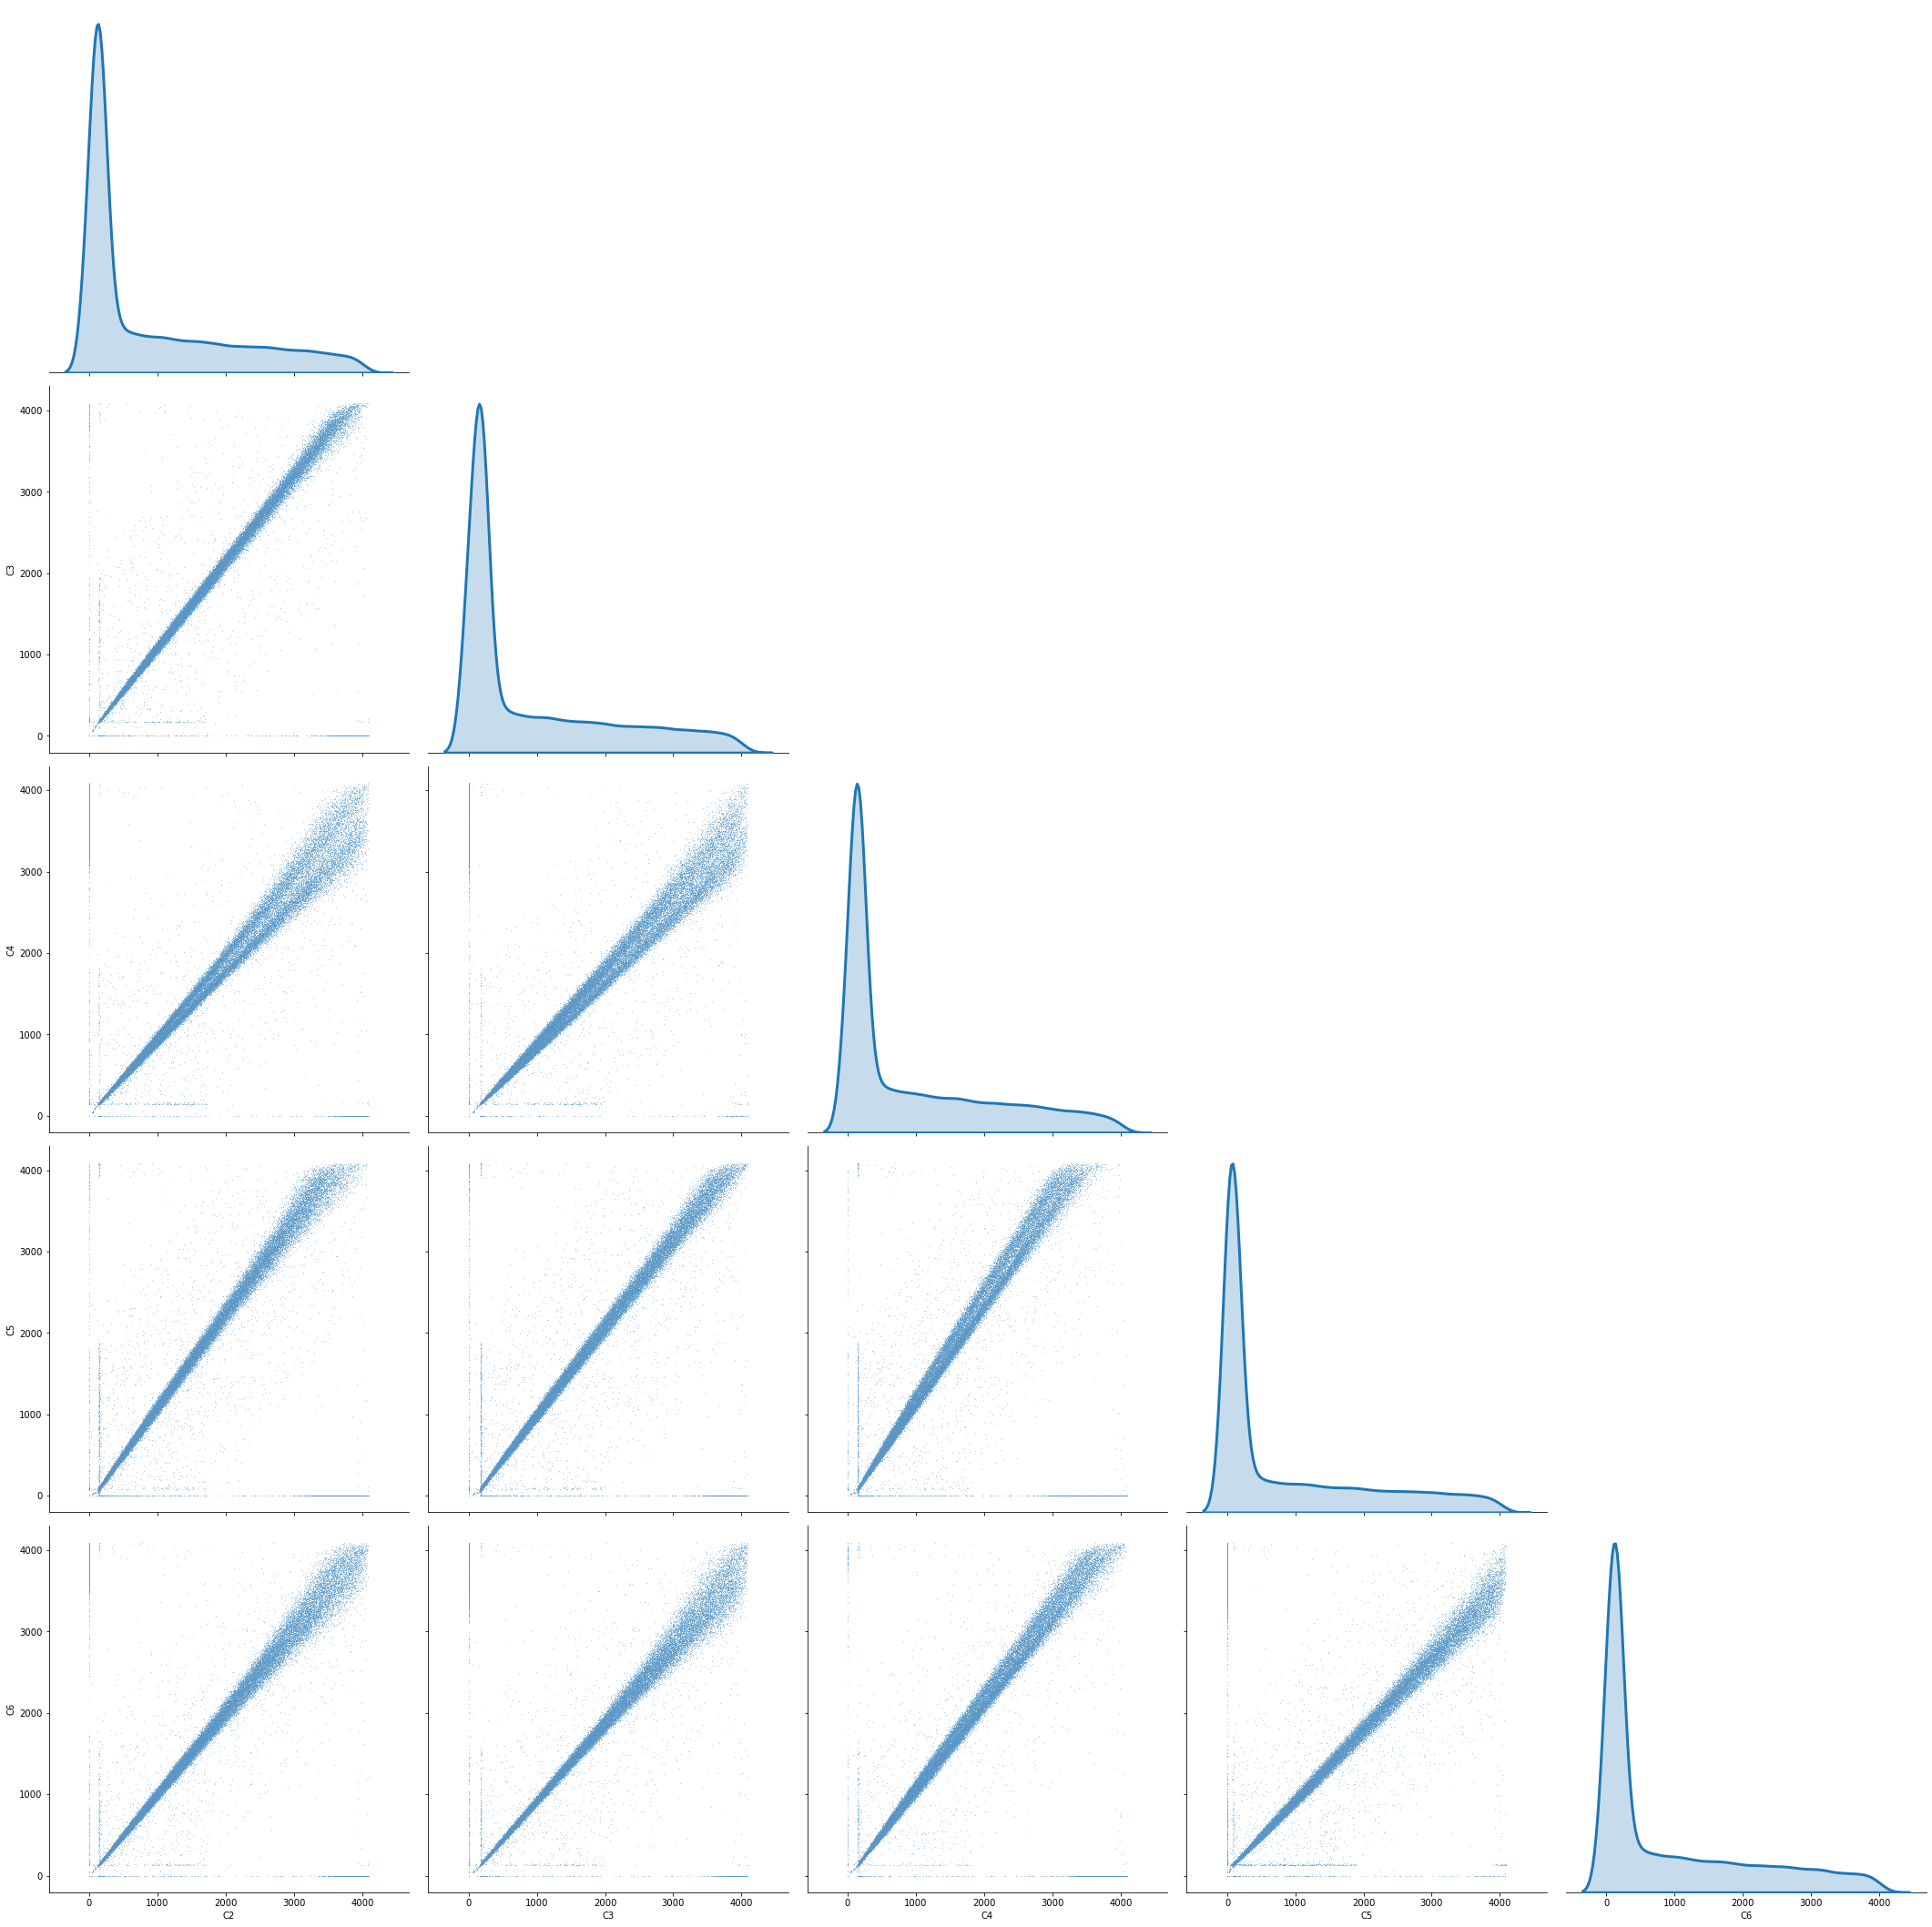

In [46]:
g = sb.PairGrid(df[["C2", "C3", "C4", "C5", "C6"]], diag_sharey=False, height=6, corner=True)
g.map_lower(sb.scatterplot, s=1, alpha=0.5)
g.map_diag(sb.kdeplot, lw=3, shade=True)

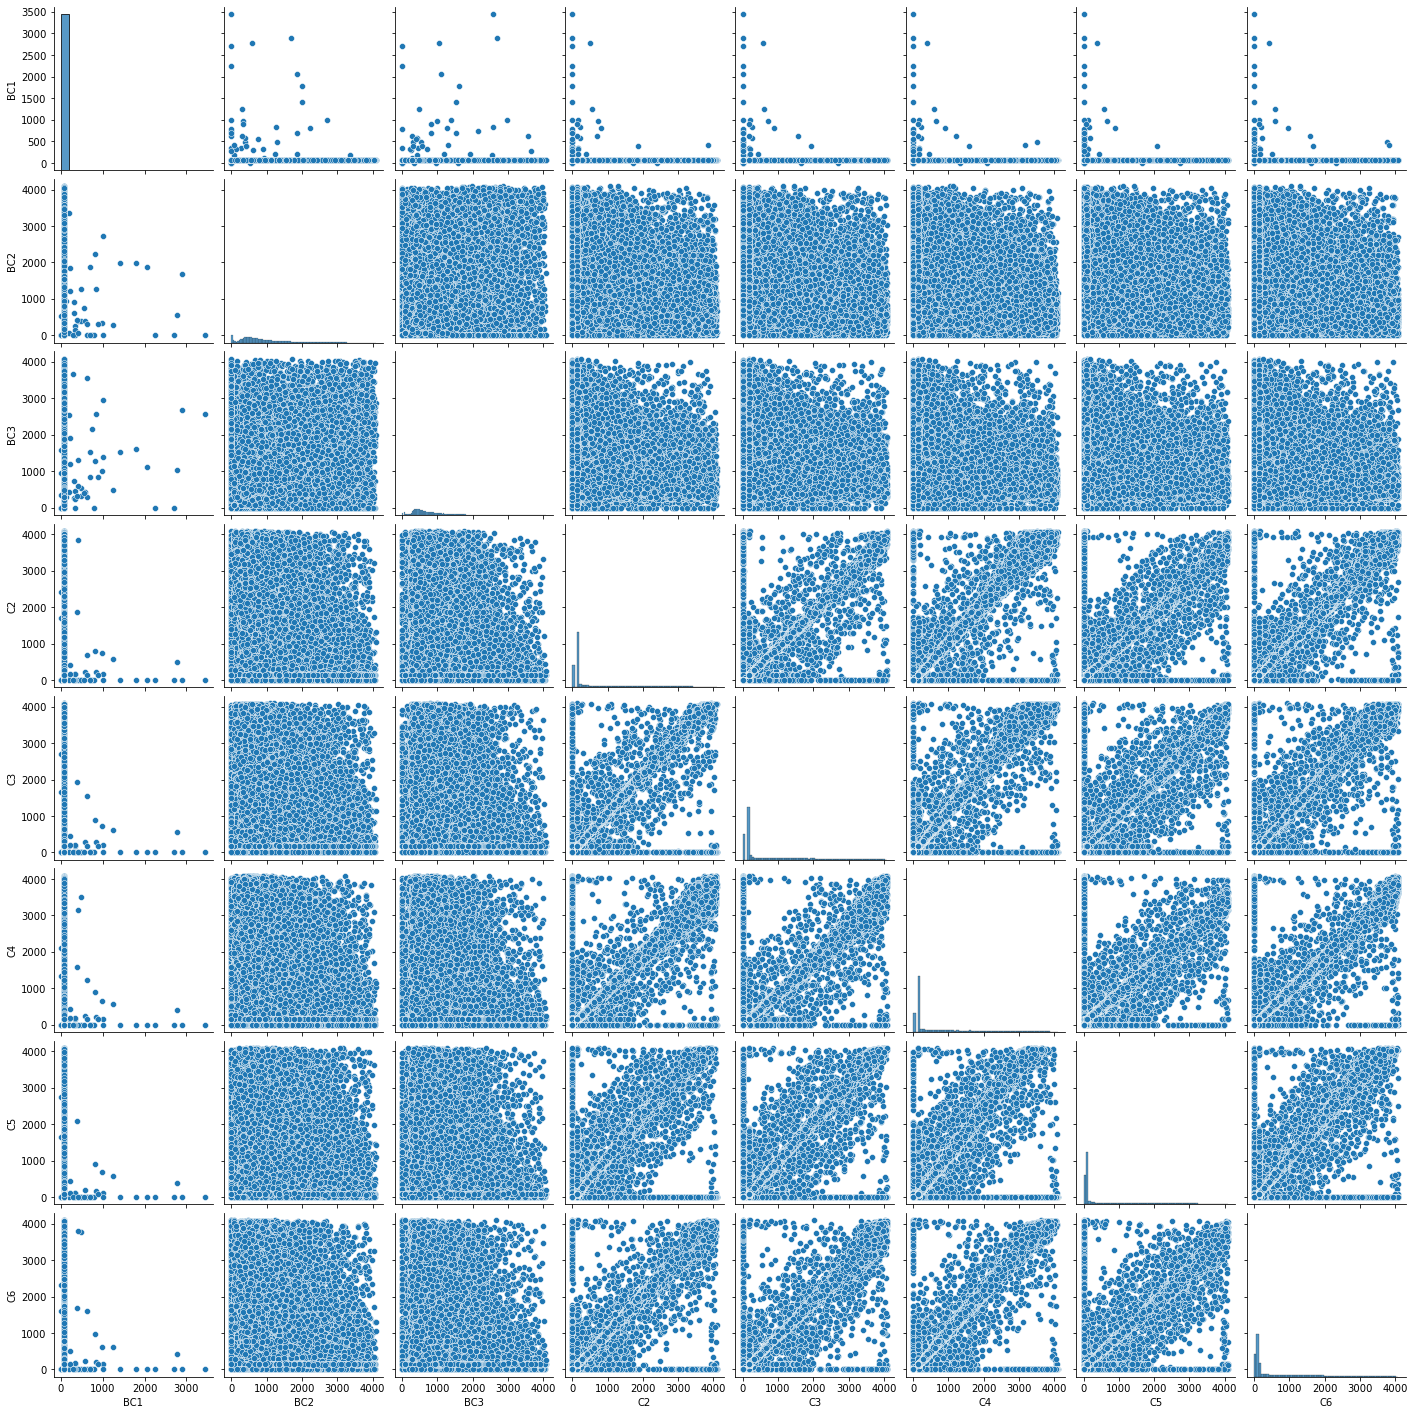

In [41]:
sb.pairplot(df)

In [42]:
np.__version__

'1.22.4'